Carlos Garcia - 21000475

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Problema 1

In [2]:
def getImage(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    return img

In [3]:
def gray_scale(img):
    weights = np.array([0.114, 0.587, 0.299])
    gray_img = np.dot(img, weights)
    gray_img = gray_img.astype('int')
    return gray_img

In [4]:
def imgBinarizer(img):
    outputImg = np.piecewise(img, [img <= 127, img > 127], [0, 255])
    return outputImg

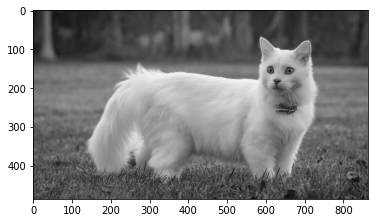

In [5]:
img = getImage('./imgs/gato.jpg')
img = gray_scale(img)
plt.imshow(img, cmap = 'gray')

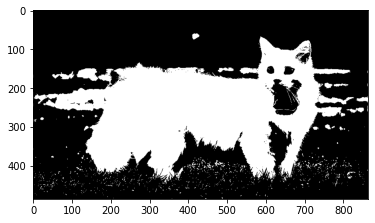

In [6]:
binary_img = imgBinarizer(img)
plt.imshow(binary_img, cmap = 'gray')

### Problema 2

In [7]:
img1 = getImage('./imgs/circle.png')
img2 = getImage('./imgs/square.png')
img3 = getImage('./imgs/triangle.png')

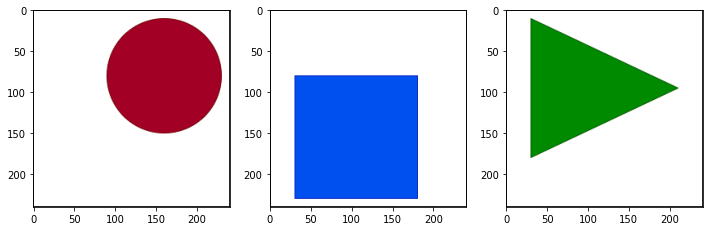

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 12))
axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(img3)
plt.show()

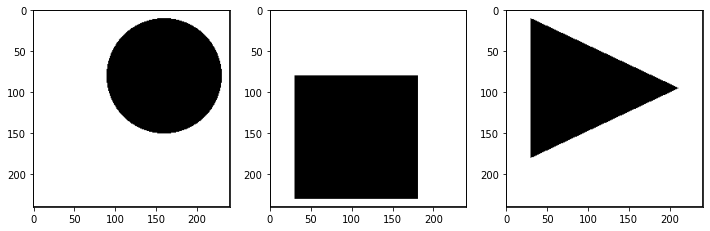

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 12))
axs[0].imshow(imgBinarizer(gray_scale(img1)), cmap = 'gray')
axs[1].imshow(imgBinarizer(gray_scale(img2)), cmap = 'gray')
axs[2].imshow(imgBinarizer(gray_scale(img3)), cmap = 'gray')
plt.show()

In [10]:
def logicOperations(img1, img2):
    img1 = imgBinarizer(gray_scale(img1))
    img2 = imgBinarizer(gray_scale(img2))
    
    img_add = img1 + img2
    img_sum = np.maximum(img1, img2)
    img_sub = np.where(img1 - img2 < 0, 0, img1 - img2)
    img_and = np.where(img_add > 255, 255, 0)
    img_or  = np.where(img_add >= 255, 255, 0)
    img_xor = np.where(img_add == 255, 255, 0)
    imgs = [img_sum, img_sub, img_and, img_or, img_xor]
    
    fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = (13, 13))
    operations = ['Suma', 'Resta', 'AND', 'OR', 'XOR']
    for i in range(0,5):
        axs[i].set_title(operations[i])
        axs[i].imshow(imgs[i], cmap = 'gray')
    plt.show()
    
    return imgs
    

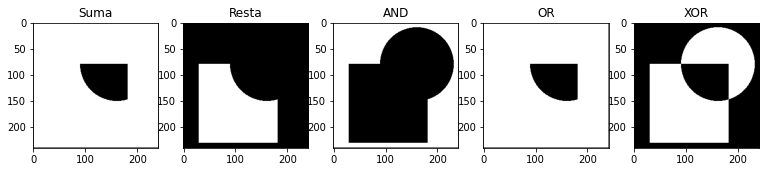

In [11]:
operations = logicOperations(img1, img2)

### Problema 3

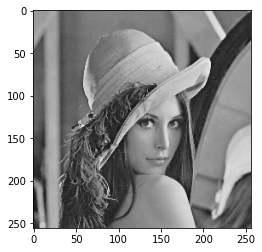

In [12]:
img = getImage('./imgs/lena.png')
img = gray_scale(img)
plt.imshow(img, cmap = 'gray')

In [13]:
def get3D(img):
    height = img.shape[0]
    width = img.shape[1]
    
    #new_img = np.expand_dims(img, axis = 2)
    X = np.arange(0, width, 1)
    Y = np.arange(0, height, 1)
    X, Y = np.meshgrid(X, Y)
    Z = img
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (12, 8))
    ax.plot_surface(X, Y, Z, rstride = 10, cstride = 10, color = "gray")
    ax.view_init(50, 70)
    plt.draw()
    
    fig.suptitle("3D Image",fontsize = 15)
    plt.show()
    
    return    

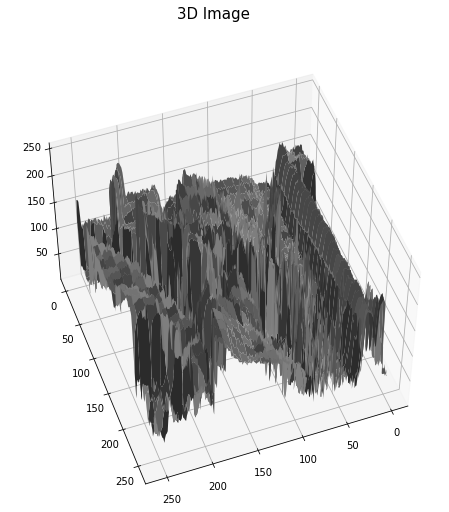

In [14]:
get3D(img)

### Problema 4

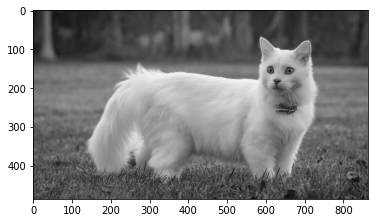

In [15]:
img = getImage('./imgs/gato.jpg')
img = gray_scale(img)
plt.imshow(img, cmap = 'gray')

In [16]:
def getTransformation(img, t = 1, alpha = 1, beta = 1, gamma = 1):
    transformations = ['negativa', 'lineal', 'log', 'exp']
    if t == 1: #negativa
        s = 255 - img
    elif t == 2: #lineal
        s = alpha * img + beta
    elif t == 3: #log
        s = alpha * np.log(1 + img)
    elif t == 4: #exp
        s = alpha * np.power(img, gamma)
    s = s.astype('int')
    s = np.where(s < 0, 0, s)
    s = np.where(s > 255, 255, s)
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 13))
    axs[0].set_title('original')
    axs[0].imshow(img, cmap = 'gray')
    axs[1].set_title('Imagen con transformacion {}'.format(transformations[t-1]))
    axs[1].imshow(s, cmap = 'gray')
    plt.show()
    
    return s  
        

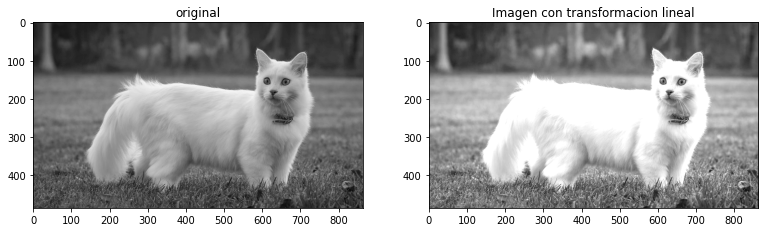

In [17]:
transformedImg = getTransformation(img, t = 2, alpha = 1.3, beta = 30, gamma = 1/2)

### Problema 5

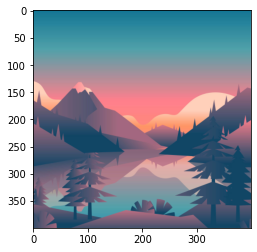

In [18]:
img = getImage('./imgs/landscape.jpg')
img = cv2.resize(img, (400,400), interpolation = cv2.INTER_AREA)
plt.imshow(img)

In [19]:
def compareImages(img1, img2):
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 13))
    axs[0].set_title('original')
    axs[0].imshow(img1)
    axs[1].set_title('Imagen con filtro')
    axs[1].imshow(img2)
    plt.show()
    
    return

In [20]:
def filterImage(img, kernel):
    n = img.shape[0]
    f = kernel.shape[0]
    p = int((f-1)/2)
    
    channels = []
    for c in range(0,3):
        cmatrix = np.pad(img[:, :, c], (p,p), mode = 'constant', constant_values=(0, 0))      
        outputImg = np.zeros_like(img[:, :, c])
        for i in range(0, n):
            for j in range(0, n):
                new_pixel = np.sum(cmatrix[i:i+f,j:j+f] * kernel)
                outputImg[i, j] = new_pixel
        channels.append(outputImg)
        
    outputImg = np.stack((channels[0], channels[1], channels[2]), axis=-1) 
    compareImages(img, outputImg)
    
    return outputImg

In [21]:
kernel = np.array([[1,0,-1], [0,0,0], [-1,0,1]]) #edge
#kernel = (1/16) * np.array([[1,2,1], [2,4,2], [1,2,1]]) #gaussian-blur
#kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]]) #sharpen
#kernel = (1/256) * np.array([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
kernel

array([[ 1,  0, -1],
       [ 0,  0,  0],
       [-1,  0,  1]])

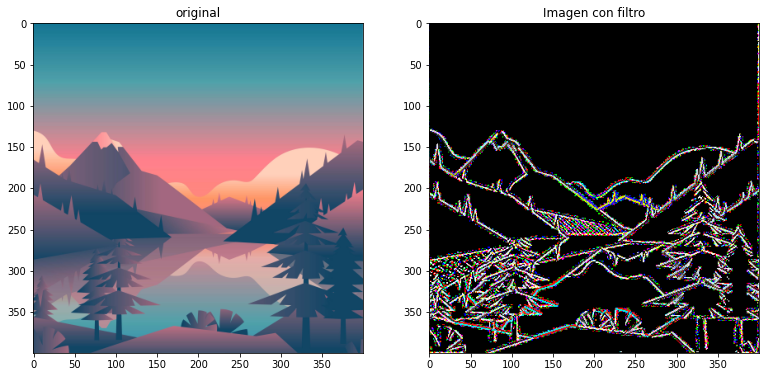

In [22]:
filteredImg = filterImage(img, kernel)